In [1]:
import os
import cv2
import numpy as np
import math
import sys

import matplotlib.pyplot as plt
%matplotlib inline

################################
def drawPolygon(img, points, color):
    imgout = img.copy()
    prev_point = points[0]
    for p in points[1:,:]:
        cv2.line(imgout, tuple(prev_point), tuple(p), 
                 color=color, thickness=2)
        prev_point = p
    cv2.line(imgout, tuple(prev_point), tuple(points[0,:]), color=color, thickness=2)
    return imgout


In [28]:

################################
# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :
    
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
    
    #rbound = cv2.boundingRect(np.float32([dstTri]))
    #print(rbound)
    #size = (rbound[2], rbound[3])
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst

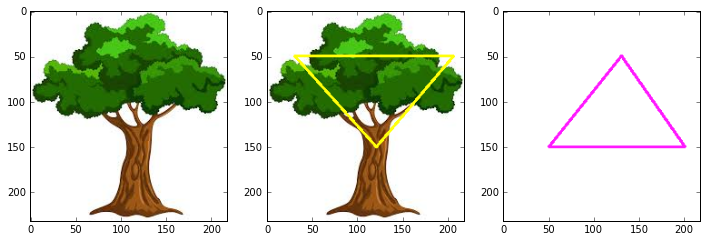

In [32]:
img = cv2.imread('figs/tree.jpg')

tri1 = np.array([[30,50], [205,50], [120, 150]])
tri2 = np.array([[200,150], [50, 150], [130,50]])

plt.figure(figsize=(12,18))
plt.subplot(1,3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3, 2)
plt.imshow(cv2.cvtColor(drawPolygon(img, tri1, (10,255,255)), cv2.COLOR_BGR2RGB))
plt.subplot(1,3, 3)

plt.imshow(cv2.cvtColor(drawPolygon(255*np.ones(shape=img.shape, dtype=img.dtype), \
                                    tri2, (255,25,255)), cv2.COLOR_BGR2RGB))
plt.imshow
plt.show()

(232, 218, 3) uint8
(232, 218, 3) uint8


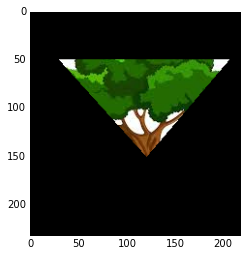

In [33]:
def genMask(src, tri):
    mask = np.zeros(src.shape, dtype = src.dtype)
    cv2.fillConvexPoly(mask, np.int32(tri), (1.0, 1.0, 1.0), 16, 0);
    return mask

print(img.shape, img.dtype)
img_masked = img * genMask(img, tri1)
print(img_masked.shape, img.dtype)
plt.imshow(cv2.cvtColor(img * genMask(img, tri1), cv2.COLOR_BGR2RGB))
plt.show()

(50, 50, 151, 101)


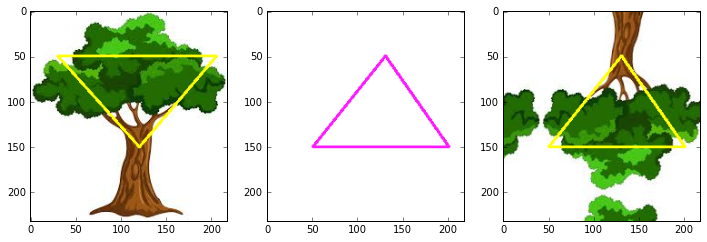

In [35]:
res = applyAffineTransform(img, tri1, tri2, (img.shape[1], img.shape[0]))

plt.figure(figsize=(12,18))
plt.subplot(1,3, 1)
plt.imshow(cv2.cvtColor(drawPolygon(img, tri1, (10,255,255)), cv2.COLOR_BGR2RGB))

plt.subplot(1,3, 2)
plt.imshow(cv2.cvtColor(drawPolygon(255*np.ones(shape=img.shape, dtype=img.dtype), \
                                    tri2, (255,25,255)), cv2.COLOR_BGR2RGB))
plt.subplot(1,3, 3)
plt.imshow(cv2.cvtColor(drawPolygon(res, tri2, (10,255,255)), cv2.COLOR_BGR2RGB))

plt.imshow
plt.show()

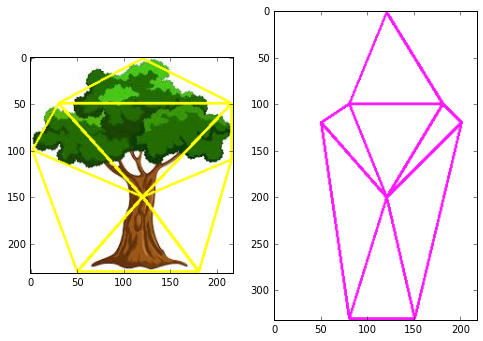

In [39]:
srcTrilist = [np.array([[30,50], [215,50], [120, 150]]), \
              np.array([[30,50], [120,2], [215,50]]), \
              np.array([[215,50], [215,110], [120,150]]), \
              np.array([[120,150], [2,100], [30,50]]), \
              np.array([[120,150], [180,230], [50,230]]),\
              np.array([[215,110], [180,230], [120,150]]),\
              np.array([[50,230], [2,100], [120,150]]) ]

dstTrilist = [np.array([[80,100], [180,100], [120, 200]]), \
              np.array([[80,100], [120,2], [180,100]]), \
              np.array([[180,100], [200,120], [120,200]]), \
              np.array([[120,200], [50,120], [80,100]]), \
              np.array([[120,200], [150,330], [80,330]]), \
              np.array([[200,120], [150,330], [120,200]]), \
              np.array([[80,330], [50,120], [120,200]])]

imgtriangles = img.copy()
for t in srcTrilist:
    imgtriangles = drawPolygon(imgtriangles, t, (10,255,255))

img2 = 255*np.ones(shape=(332, 218, 3), dtype=img.dtype)
for t in dstTrilist:
    img2 = drawPolygon(img2, t, (255,25,255))

plt.figure(figsize=(8,14))
plt.subplot(1,2, 1)
plt.imshow(cv2.cvtColor(imgtriangles, cv2.COLOR_BGR2RGB))
plt.subplot(1,2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

(80, 100, 101, 101)
(80, 2, 101, 99)
(120, 100, 81, 101)
(50, 100, 71, 101)
(80, 200, 71, 131)
(120, 120, 81, 211)
(50, 120, 71, 211)


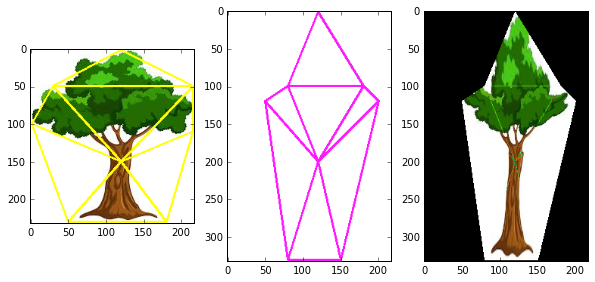

In [42]:
img3 = np.zeros(shape=(332, 218, 3), dtype=img.dtype)

for t1,t2 in zip(srcTrilist, dstTrilist):
    res = applyAffineTransform(img, t1, t2, (img3.shape[1], img3.shape[0]))
    img3 += res * genMask(res, t2)
    

plt.figure(figsize=(10,20))
plt.subplot(1,3, 1)
plt.imshow(cv2.cvtColor(imgtriangles, cv2.COLOR_BGR2RGB))
plt.subplot(1,3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(1,3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()